# Chapter 2. 試著利用機器學習進行分析

這章要學習執行程式的流程，以便學習機器的基礎。

> _**以下內容會傾向使用統計學的模式說明 K-means、Random Forest、與 SVM Regression 這幾個主題**_
>

## Section 1. Exploratory Data Analysis

在開始建立各種模型之前，要先透過 EDA 了解目前資料的現狀，而 EDA 背後就是統計與機率。因此這邊會先定義基本的機率論內容

### Step A. 相關數學定義與性質

> 這裡數學式看不懂沒關係，但還是建議了解一下這些東西在機器學習中是很常用的

#### A.1 統計學相關

所謂 EDA 就是會使用樣本 $\mathcal{D}$ 進行系統性的資料探索，結構、異常點、變數間的關係，並形成關於母體聯合機率分佈 $P(\mathbf{X}, Y)$ 的初步假設，可以分為 **離散型（Discrete） 與 連續型（Continuous）**。其中樣本 $\mathcal{D}$ 定義為 

$$
\mathcal{D} = \{ (\mathbf{x}_i, y_i) \}_{i=1}^{n}
$$

而 **聯合機率分佈 Joint Probability Distribution** 主要可以分為以下兩種：

- Discrete 資料 的聯合分佈會使用 _聯合機率 質量 函數_ $P(\mathbf{x}, y)$ 描述所有可能的 $(\mathbf{x}, y)$ 組合，而函數值 $P(\mathbf{X}=\mathbf{x}, Y=y)$ 必須介於 $[0, 1]$ 之間，且所有組合的機率總和必須滿足
   
   $$
   \sum_{\mathbf{x}} \sum_{y} P(\mathbf{X}=\mathbf{x}, Y=y) = 1
   $$

- **Continuous 資料** 的聯合分佈會使用 _聯合機率 **密度** 函數_ $f_{\mathbf{X}, Y}(\mathbf{x}, y)$ 定義，若 $\mathbf{X}$ 空間中的區域 $A$ 和在 $Y$ 空間中的區域 $B$， $(\mathbf{X}, Y)$ 落在 $(A, B)$ 區域的機率為
   
   $$
   P(\mathbf{X} \in A, Y \in B) = \iint_{A \times B} f_{\mathbf{X}, Y}(\mathbf{x}, y) d\mathbf{x} dy
   $$
   
   其中 $\mathcal{S}$ 為樣本空間，密度函數在整個空間上的積分必須等於 1，且密度為非負值

   $$
   \iint_{\mathcal{S}} f_{\mathbf{X}, Y}(\mathbf{x}, y) \, d\mathbf{x} \, dy = 1, \quad f_{\mathbf{X}, Y}(\mathbf{x}, y) \ge 0
   $$

以上相關內容可以參考 [R. D. Yates and D. J. Goodman, _Probability and Stochastic Processes: A Friendly Introduction for Electrical and Computer Engineers_, 3rd ed. Hoboken, NJ, USA: Wiley, 2014.](https://www.amazon.com/Probability-Stochastic-Processes-Introduction-Electrical/dp/1118324560)

#### A.2 線性代數相關

PCA 技術源自於 SVD，而 SVD 是一種把任意矩陣 $X \in \mathcal{F}^{n \times p}$（即不限定方陣）提取出矩陣特徵的方式，那這就跟矩陣的特徵值（Eigenvalue）有關

1. 先從 Eigenvalue 說起：給定方陣 $A$ 為

   $$
   A = \begin{pmatrix} 3 & 0 \\ 0 & 2 \end{pmatrix}
   $$

   $A$ 會把任何向量的 $x$ 分量乘以 3、 $y$ 分量乘以 2；換句話說就是在水平方向上把平面拉伸 3 倍，在垂直方向上拉伸 2 倍。現在隨機選一個向量，如以下旋轉右上 45 度的方向： 

   $$
   v = \begin{pmatrix} 1 \\ 1 \end{pmatrix}
   $$

   可以計算

   $$
   Av = \begin{pmatrix} 3 & 0 \\ 0 & 2 \end{pmatrix} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \begin{pmatrix} 3 \times 1 + 0 \times 1 \\ 0 \times 1 + 2 \times 1 \end{pmatrix} = \begin{pmatrix} 3 \\ 2 \end{pmatrix}
   $$

   這時輸入和輸出的方向不一樣了，因為輸入向量在 $y=x$ 這條線上，而輸出向量在 $y = \frac{2}{3}x$ 這條線上。而對於大多數的向量，$A$ 不僅會改變向量的長度，還會改變向量的方向

   現在有一個關鍵問題：有沒有哪些「特殊」的向量被 $A$ 轉換後，方向完全不變，只有長度被縮放？嘗試選一個完全躺在 $x$ 軸上的向量，比如 $v_1 = \begin{pmatrix} 1 & 0 \end{pmatrix}^T$ 帶入 $A$ 計算

   $$
   Av_1 = \begin{pmatrix} 3 & 0 \\ 0 & 2 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 3 \\ 0 \end{pmatrix}
   $$

   向量 $\begin{pmatrix} 3 & 0 \end{pmatrix}^T$ 仍然在 $x$ 軸上，可以發現輸出向量恰好是輸入向量的 3 倍。因此對於一個方陣，那些經過轉換後方向不變的特殊向量，就稱為該方陣的 **特徵向量（Eigenvector）**；而特徵向量在轉換時，其長度被縮放的比例，就稱為該特徵向量對應的 **特徵值（Eigenvalue）**。例如 特徵向量 $\begin{pmatrix} 1 & 0 \end{pmatrix}^T$ 對應的特徵值是 3

   這個關係可以寫成 $Av = \lambda v$，其中 $v$ 是特徵向量，$\lambda$ (lambda) 是特徵值

2. 那下一個自然的問題就是：如果我們的矩陣不是方的（例如 $3 \times 2$），它把一個 2D 向量變成一個 3D 向量，那要如何描述該向量的「主要作用方向」和「縮放比例」呢？

   SVD 就是用來做這件事情的，通過一系列推導，SVD 直接斷言對於任意矩陣，都可以被分解為三個特定矩陣的乘積

   $$
   X = U \Sigma V^T
   $$

   其中:

   1. $U$ 是一個 $n \times n$ 的正交矩陣，即滿足 $U^T U = UU^T = I_n$。而 $U$ 的行向量 $\{u_1, u_2, \ldots, u_n\}$ 稱為 **左奇異向量**，主要構成 $X$ 的行空間，即在 $\mathbb{R}^n$ 中的正交基底（orthogogal basis）

      $$
      U = \begin{pmatrix} | & | & & | \\ u_1 & u_2 & \cdots & u_n \\ | & | & & | \end{pmatrix}
      $$

   2. $\Sigma$ 是一個 $n \times p$ 的矩形對角矩陣。其對角元素 $\sigma_1, \sigma_2, \ldots, \sigma_r$ 為 $X$ 的**奇異值**，其中 $r = \text{rank}(X)$。這些奇異值為非負有序基底構成，即 $\sigma_1 \ge \sigma_2 \ge \ldots \ge \sigma_r > 0$

      $$
      \Sigma = \text{diag}(\sigma_1, \sigma_2, \ldots, \sigma_r, 0, \ldots, 0)
      $$

   3. $V$ 是一個 $p \times p$ 的正交矩陣，即滿足 $V^T V = VV^T = I_p$。而 $V$ 的行向量 $\{v_1, v_2, \ldots, v_p\}$ 稱為 **右奇異向量** ，主要構成 $X$ 的列空間，在 $\mathbb{R}^p$ 中的正交基底

      $$
      V = \begin{pmatrix} | & | & & | \\ v_1 & v_2 & \cdots & v_p \\ | & | & & | \end{pmatrix} \implies V^T = \begin{pmatrix} — & v_1^T & — \\ — & v_2^T & — \\ & \vdots & \\ — & v_p^T & — \end{pmatrix}
      $$

   將以上 $X = U \Sigma V^T$ 帶入後，得

   $$
   \begin{aligned}
   X &= (U \Sigma) V^T \\ &= \begin{pmatrix}
   | & | & & | 
   \\ \sigma_1 u_1 & \sigma_2 u_2 & \cdots & \sigma_p u_p 
   \\ | & | & & | \end{pmatrix} \begin{pmatrix} — & v_1^T & — 
   \\ — & v_2^T & — 
   \\ & \vdots & 
   \\ — & v_p^T & — 
   \end{pmatrix} \\ &= (\sigma_1 u_1)v_1^T + (\sigma_2 u_2)v_2^T + \cdots + (\sigma_p u_p)v_p^T \\ &= \sum_{i=1}^{p} (\sigma_i u_i) v_i^T 
   \end{aligned}
   $$

   由於只有前 $r$ 個奇異值不為零（其中 $r = \text{rank}(X)$），所以這個總和數學式可以簡化為

   $$
   X = \sum_{i=1}^{r} \sigma_i u_i v_i^T
   $$

3. 現在就可以建立 SVD 和 PCA 之間的關係了，這之間的關係在於：對中心化數據矩陣 $X$ 進行 SVD 與 對共變異數矩陣 $S$ 進行特徵分解 是等價的。這時要從共變異數矩陣的定義開始，並將 $X$ 的 SVD 分解式 $X=U\Sigma V^T$ 代入


   $$\begin{aligned}
   S &= \frac{1}{n-1} X^T X \\
   &= \frac{1}{n-1} (U \Sigma V^T)^T (U \Sigma V^T) \\
   &= \frac{1}{n-1} (V \Sigma^T U^T) (U \Sigma V^T) & & \text{; Property of Transpose } (ABC)^T = C^T B^T A^T \\
   &= \frac{1}{n-1} V \Sigma^T (U^T U) \Sigma V^T & & \text{; Associativity of matrix multiplication} \\
   &= \frac{1}{n-1} V (\Sigma^T \Sigma) V^T & & \text{; Since U is orthogonal matrix, } U^T U = I
   \end{aligned}$$

   其中，$\Sigma^T \Sigma$ 是一個 $p \times p$ 的對角矩陣，其對角元為奇異值的平方，即 $\text{diag}(\sigma_1^2, \sigma_2^2, \ldots, \sigma_p^2)$

   因此，共變異數矩陣的表達式變為

   $$
   S = V \left( \frac{\text{diag}(\sigma_1^2, \ldots, \sigma_p^2)}{n-1} \right) V^T
   $$

   1. 回顧對稱矩陣 $S$ 的特徵分解定義 $S = W \Lambda W^T$，其中 W 是由 S 的特徵向量組成的正交矩陣，$\Lambda$ 是由對應的特徵值組成的對角矩陣

   2. 同時將 SVD 推導結果與特徵分解的定義進行比較，得 
      
      $$
      S = V \left( \frac{\Sigma^T \Sigma}{n-1} \right) V^T
      $$

   綜合上述，這時可以直接得出以下結論：

   1. 共變異數矩陣 $S$ 的特徵向量就是對稱冪等矩陣 $X$ 的右奇異向量 $PC_j = v_j$
   2. 共變異數矩陣 $S$ 的第 $j$ 個特徵值 $λ_j$​ 與 $X$ 的第 $j$ 個奇異值 $\sigma_j$​ 之間的關係為

   $$
   \lambda_j = \frac{\sigma_j^2}{n-1}
   $$

   代表由 SVD 得到的奇異值考以直接量化每個主成分所能解釋的變異量

以上相關內容可以參考 
- 對於 Eigenvalue、SVD 等：[S. H. Friedberg, A. J. Insel, and L. E. Spence, _Linear Algebra_, 5th ed. Upper Saddle River, NJ, USA: Pearson, 2019.](https://www.amazon.com/Linear-Algebra-5th-Stephen-Friedberg/dp/B0B9HBT4XH)
- 對於 PCA 等原理：[G. Strang, _Linear Algebra and Learning from Data_, 1st ed. Wellesley, MA, USA: Wellesley-Cambridge Press, 2019.](https://www.amazon.com/Linear-Algebra-Learning-Gilbert-Strang/dp/0692196382)

### Step B. 檢視資料集

標準作法上，首先一律用 `pandas` 印出資料集

In [1]:
import pandas as pd
df = pd.read_csv("accomodation_info.csv", index_col=0, parse_dates=[0])
df

,病人ID,病人姓名,科別,金額
日期,,,,
2018-11-01 00:02:21,110034,若松 花子,B,19000
2018-11-01 00:03:10,112804,津田 美加子,D,20000
2018-11-01 00:06:19,110275,吉本 美加子,D,20000
2018-11-01 00:08:41,110169,坂本 直人,B,19000
2018-11-01 00:12:22,111504,青山 零,A,15000
...,...,...,...,...
2020-10-31 23:38:51,110049,吉本 篤司,A,3000
2020-10-31 23:42:12,110127,喜嶋 浩,A,3000
2020-10-31 23:47:24,115464,藤本 明美,D,8000


上面的 df 結果就可以看成是 $P(\mathbf{X}, Y)$ 中抽樣出來的觀測樣本集合 $\mathcal{D}$，其中 
- $\mathbf{x}_i$ 是病患的特徵向量，例如包含科別與金額等
- $y_i$ 則是目標變數，例如就診的結果（也就是後續做 ML 模型的結果）

也就是說，在給定資料 $\mathcal{D}$ 下，透過 EDA 結果來幫助我們做出 ML 模型，使 ML 模型能學習 $\mathcal{D}$ 中的 條件機率模式（即對 $P(Y|\mathbf{X})$ 的估計），從而推論這些模式可以 generalize 到整個母體聯合機率分佈 $P(\mathbf{X}, Y)$，以進行分群（clustering）、分類（classification）或預測（prediction）

在知道後續要做這些事情之前，就要先知道資料集的狀態如何。因此執行以下程式：

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71722 entries, 2018-11-01 00:02:21 to 2020-10-31 23:57:21
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   病人ID    71722 non-null  int64 
 1   病人姓名    71722 non-null  object
 2   科別      71722 non-null  object
 3   金額      71722 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.7+ MB


可以看到資料為 Non-Null Count，所以資料集是乾淨的無空缺值；而另可以透過以下程式是作基本的統計摘要

In [3]:
pd.options.display.float_format = "{:.3f}".format

df.describe()

,病人ID,金額
count,71722.000,71722.000
mean,111910.459,16317.796
std,2027.224,5231.613
min,109988.000,3000.000
25%,110269.000,15000.000
50%,110692.000,19000.000
75%,113525.000,20000.000
max,116508.000,22000.000


初步可以看到平均數（50%）到第三四分位距（75%）距離，明顯比起（25%）到（50%）還要接近，也就是大多數的就診金額都還是落在較高的區間

### Step C. 執行資料探勘

作業中提到要「分析並預測病患的就診行為」，那 EDA 可以對應的偵查方向通常有兩個（當然不只這些）：

1. 分析時間序列的趨勢，如 每個月的就診總次數，就可以會對應到「多久回診或整體回診情況」
2. 分析類別型資料的分佈情況，如 科別 等就可以對應到「病患都去那一個門診看診」

> _切記，絕對不只這些問題可以分析，重點在你要先找到第一個切入點_

以下先從整體時間趨勢來看這整個資料集。若要觀察時間趨勢，那就需要將資料從「單筆就診紀錄」轉換成「單位時間內的就診次數」。在數學上，這可以看作是建立一個新的時間序列 $N(t)$，其中 $t$ 代表月份，而 $N(t)$ 是該月份的總就診次數

由於 index 已經是 `DatetimeIndex` 的型態，因此可以直接操作 `.resample()`，隨後透過 `matplotlib` 把趨勢簡單印出來觀察

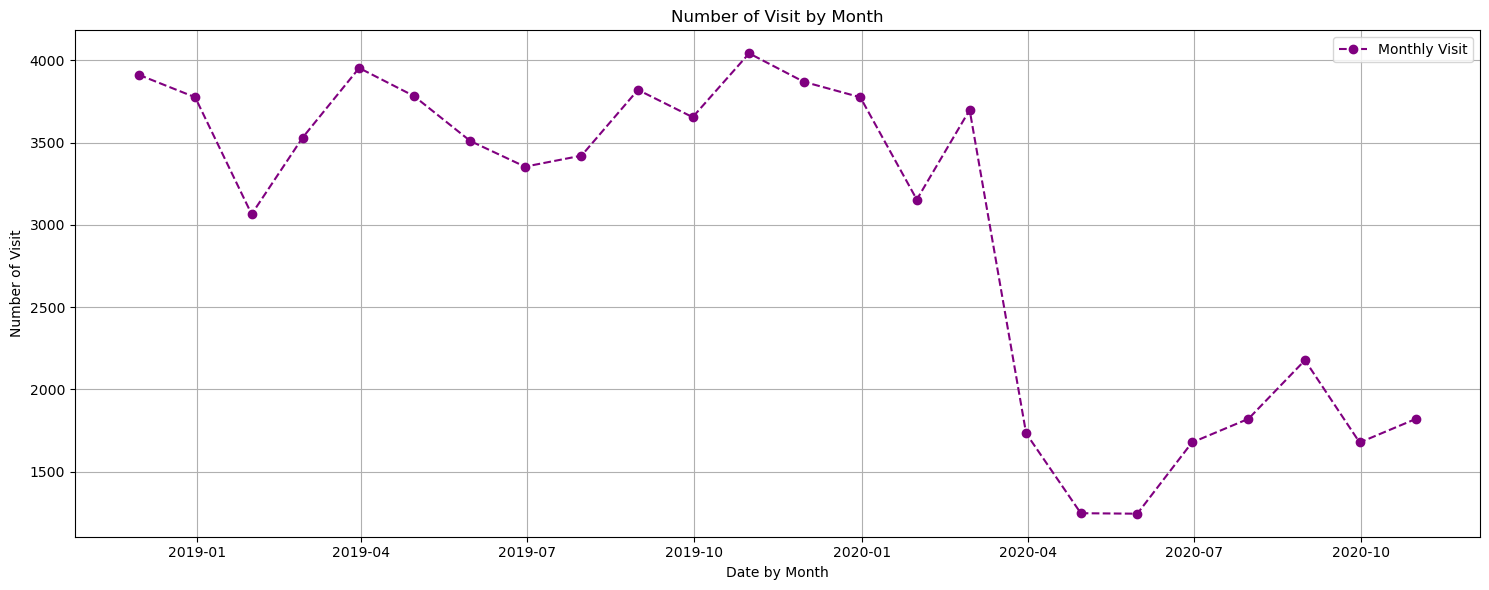

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_monthly_counts = df.resample("ME").size()

fig, ax = plt.subplots(figsize=(15,6))

ax.plot(
    df_monthly_counts,
    color="purple",
    linestyle="--",
    marker="o",
    label="Monthly Visit",
)
ax.set_title("Number of Visit by Month")
ax.set_xlabel("Date by Month")
ax.set_ylabel("Number of Visit")
ax.legend()
ax.grid(True)

date_format = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_format)
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()


現在可以很直接看到 2020 年 3 月的就診次數開始就明顯下降，所以根據這個觀察結果，可以定義 2020 年 3 月 1 日 00:00:00 的前後分別為「疫情前」與「疫情後」

而接下來就可以進入「就診模式」，即「都去哪一個門診看診」。這時候要分析 `科別` 這個欄位，要了解病患都去哪些科別，第一步通常是計算各個科別出現的總次數。比照前面模式，因為 `科別` 屬於名目尺度，因此可以直接將比較表製作成長條圖

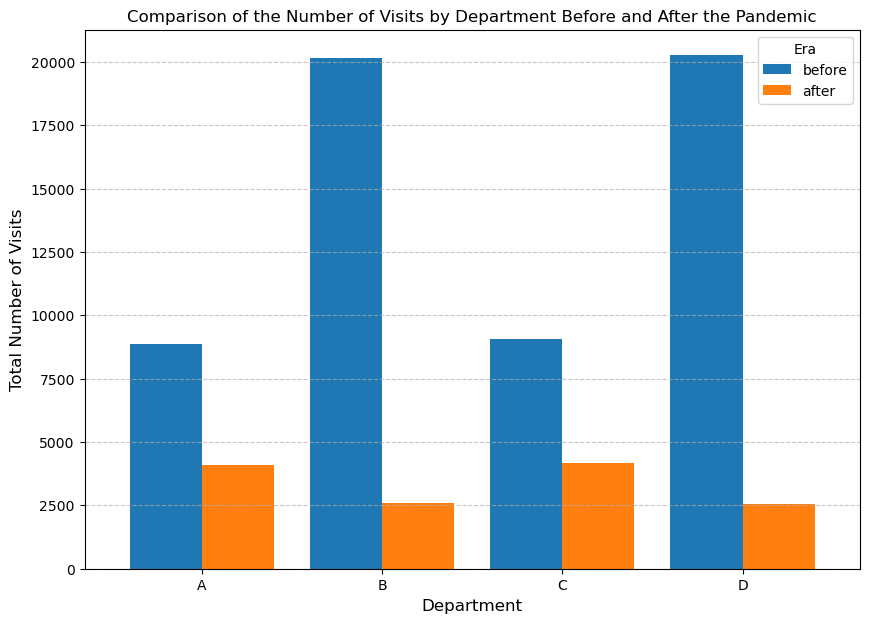

In [5]:
import numpy as np

split_date = pd.to_datetime("2020-03-01")
df["period"] = np.where(df.index < split_date, "before", "after")

df_department_summary = pd.crosstab(df["科別"], df["period"])
df_department_summary = df_department_summary[["before", "after"]]

df_department_summary.plot(kind="bar", figsize=(10, 7), width=0.8)

plt.title(
    "Comparison of the Number of Visits by Department Before and After the Pandemic",
    fontsize=12,
)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Total Number of Visits", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Era")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

到這邊，已經可以找出兩個 Overview 的 Insight，即

1. 時間趨勢上，就診人次在 2020 年 3 月出現了斷崖式下跌
2. 類別模式上，不同科別受疫情的衝擊程度不同，而科別 B 與 D 都有顯著下降

## Section 2. Feature Engineering using K-means Algorithm

做完一個很基本的資料探勘後，就可以進入特徵工程了。根據題目，要對病患的就診行為進行集群分析，那集群相關的事物就會涉及到 K-means 演算法

### Step A. K-means 演算法定義

---
#### Definition 1. The K-means Objective Function

令 $\{X_1, X_2, \ldots, X_n\}$ 為 $n$ 個觀測資料點的集合，其中每一個 $X_i \in \mathbb{R}^p$；令 $K \in \mathbb{N}$ 為集群數量。則資料點的分割集合為集合 $\mathcal{C} = \{C_1, C_2, \ldots, C_K\}$ 使得
1. 滿足非空性： $C_k \neq \emptyset, \quad \forall \: k=1, \ldots, K$
2. 滿足互斥性： $C_k \cap C_j = \emptyset, \quad k \neq j$
3. 滿足完全覆蓋： $\cup_{k=1}^K C_k = X$

對於每一個集群 $C_k$，定義質心（Centroid）為 $\mu_k \in \mathbb{R}^p$。而 K-means 演算法就是要找到一個目標函數 $J$，其分割 $\mathcal{C}^\ast$ 以及質心集合 $\{\mu_1^\ast , \ldots, \mu_K^\ast \}$，以將群內距離平方和做到最小化

$$
J(\mathcal{C}, \{\mu_k\}) = \sum_{k=1}^{K} \sum_{X_i \in C_k} \|X_i - \mu_k\|^2
$$

最佳化問題即為

$$
(\mathcal{C}^*, \{\mu_k^*\}) = \arg\min_{\mathcal{C}, \{\mu_k\}} \sum_{k=1}^{K} \sum_{X_i \in C_k} \|X_i - \mu_k\|^2
$$

> Source: [C. S. Chang, W. Liao, Y. S. Chen, and L. H. Liou, "A Mathematical Theory for Clustering in Metric Spaces," submitted to _arXiv_, Sep. 2015.](https://arxiv.org/abs/1509.07755v1)

---

具體來說，我們要分析的是「病患行為」，那在在 `df` 中，那資料點應該是「每一個病患」，即 $\{X_1, X_2, \ldots, X_n\}$。這裡要區分 

1. **觀測單位（Unit of Observation）** 是每一筆的「就診紀錄」
2. **分析單位（Unit of Analysis）** 也就是 K-means 演算法中的資料點 $X_i$，在這裡必須是「病患」

問題在於 $X_i$ 內的特徵 的選擇，因為根據目標函數，要計算距離 $\|X_i - \mu_k\|^2$，而「病人ID」或「病人姓名」則是這個向量的 index。因此接下來的目標，就是為每一個獨一無二的「病人ID」，建立一個能代表其行為的數值向量 $X_i$

一個可行的特徵包含

1. 疫情前後就診次數：定義總就診次數，分為疫情前 `before_visits` 與疫情後 `after_visits`
2. 就診科別向量：定義病患的就診偏好，針對四個科別定義就診次數 `visits_A`、`visits_B`、`visits_C`、與 `visits_D`
3. 疫情前後開銷：定義患者的醫療費，分為疫情前 `before_spending` 與疫情後 `after_spending`

接下來就要實做這些內容

### Step B. 建立 Features

#### B.1 建立疫情前後的資料子集

根據原先定義，以 2020 年 03 月 01 日進行疫情前後的拆分

In [6]:
df_before = df[df.index < split_date]
df_after = df[df.index >= split_date]

print("df_before\n", df_before)
print()
print("df_after\n", df_after)

df_before
                        病人ID    病人姓名 科別     金額  period
日期                                                   
2018-11-01 00:02:21  110034   若松 花子  B  19000  before
2018-11-01 00:03:10  112804  津田 美加子  D  20000  before
2018-11-01 00:06:19  110275  吉本 美加子  D  20000  before
2018-11-01 00:08:41  110169   坂本 直人  B  19000  before
2018-11-01 00:12:22  111504    青山 零  A  15000  before
...                     ...     ... ..    ...     ...
2020-02-29 23:49:54  111270  中津川 里佳  C  19000  before
2020-02-29 23:52:14  112251   田中 真綾  B  19000  before
2020-02-29 23:52:51  115804   井高 真綾  D  20000  before
2020-02-29 23:53:09  112928   石田 修平  D  20000  before
2020-02-29 23:55:28  110504   田辺 京助  B  19000  before

[58326 rows x 5 columns]

df_after
                        病人ID    病人姓名 科別    金額 period
日期                                                 
2020-03-01 00:07:10  113962   野村 和也  C  7000  after
2020-03-01 00:15:35  114926  小林 さゆり  C  7000  after
2020-03-01 00:43:34  110162   佐々木 幹  C  70

#### B.2 計算每一位病患在意情前後就診次數的花費

這裡就要把病患 ID 與金額聚合在一起，因此可以使用 `groupby()` 與 `agg()` 等操作執行。定義 `agg_before` 與 `agg_after` 分別為每一位病患在意情前後就診次數的花費，則

In [7]:
agg_before = df_before.groupby("病人ID")["金額"].agg(
    before_visits="size", before_spending="sum"
)
agg_after = df_after.groupby("病人ID")["金額"].agg(
    after_visits="size", after_spending="sum"
)

print("agg_before\n", agg_before)
print()
print("agg_after\n", agg_after)

agg_before
         before_visits  before_spending
病人ID                                  
109988             57          1106000
109989             39           750000
109990             36           686000
109991             42           808000
109992             38           733000
...               ...              ...
116499              4            80000
116500              6           107000
116501              2            38000
116504             10           184000
116508              2            35000

[5420 rows x 2 columns]

agg_after
         after_visits  after_spending
病人ID                                
109988            27          128000
109989            22          123000
109990            34          190000
109991            28          166000
109992            61          331000
...              ...             ...
116495             1            8000
116496             1            7000
116498             1            8000
116500             1            7000


#### B.3：建立每位病患就診科別狀況

因為我們不可能人工審閱 71722 筆資料，更不用說逐一檢查就診科別分佈。因此假定每一位病患都可能在四個科別都有就診，定義四個科別分別對應 `visit_A` 到 `visit_D`，操作如下

In [8]:
department_vectors = pd.crosstab(
    df["病人ID"],
    df["科別"],
).rename(
    columns={
        "A": "visits_A",
        "B": "visits_B",
        "C": "visits_C",
        "D": "visits_D",
    }
)

print(department_vectors)

科別      visits_A  visits_B  visits_C  visits_D
病人ID                                          
109988        18        26        11        29
109989        13        11        11        26
109990        16        18        16        20
109991        11        26        20        13
109992        29        21        32        17
...          ...       ...       ...       ...
116499         0         0         0         4
116500         2         1         3         1
116501         0         0         2         0
116504         2         3         1         5
116508         1         0         0         1

[5486 rows x 4 columns]


#### B.4：將所有特徵合併成一個 `DataFrame`

在這邊會使用 `concat` 而非 `merge`，因為這些資料的索引都是 `病人ID`，在合併後可能會出現空缺值，因此直接補 0

In [9]:
df_patient = pd.concat([agg_before, agg_after, department_vectors], axis=1).fillna(0)
print(df_patient)

        before_visits  before_spending  after_visits  after_spending  \
病人ID                                                                   
109988         57.000      1106000.000        27.000      128000.000   
109989         39.000       750000.000        22.000      123000.000   
109990         36.000       686000.000        34.000      190000.000   
109991         42.000       808000.000        28.000      166000.000   
109992         38.000       733000.000        61.000      331000.000   
...               ...              ...           ...             ...   
116198          0.000            0.000         1.000        8000.000   
116295          0.000            0.000         1.000        8000.000   
116343          0.000            0.000         1.000        7000.000   
116422          0.000            0.000         1.000        3000.000   
116491          0.000            0.000         1.000        3000.000   

        visits_A  visits_B  visits_C  visits_D  
病人ID          

#### B.5. 回顧 Definition 1

剛剛建立的 `df_patient` 這個 `DataFrame`，就是 K-means 演算法定義中的資料點集合 $\{X_1, X_2, \ldots, X_n\}$ 的具體內容。其中

1. $n$ 是病患的總人數，也就是 df_patient 的總列數，即 5486
2. $p$ 是我們為每位病患建立的特徵數量，也就是總欄位數 8 
3. $X_i$ 就是 `df_patient` 中的第 $i$ 列，每一列都是一個 8 維的向量。例如第一位病患 `109988` 的特徵向量就是 $[57.0, 1106000.0, 27.0, 128000.0, 18, 26, 11, 29]$

### Step C. 特徵標準化

在我們將這個特徵矩陣餵給 K-means 演算法之前，要先做標準化（Standardization）。回顧 Objective Function $J$ 為

$$
J(\mathcal{C}, \{\mu_k\}) = \sum_{k=1}^{K} \sum_{X_i \in C_k} \|X_i - \mu_k\|^2
$$

這公式重點在歐幾里得距離的平方 $\|X_i - \mu_k\|^2$，對向量 $X_i$ 中的每一個維度進行操作。但可以觀察到第一位病患 `109988` 的特徵向量：

$$
X_1 = [57.0,\: \textbf{1106000.0}\:, 27.0\:, \textbf{128000.0}\:, 18\:, 26\:, 11\:, 29]
$$

這其中的 `before_spending = 1,106,000` 的數值尺度，遠遠大於 `visits_A = 18` 或 `after_visits = 27`。也就是說，這個數字在進行距離計算時，`before_spending` 這個特徵的影響力會顯著對整個結果造成影響。演算法會直接把這些病患聚集在一起，其他特徵就忽略掉了

統計學中的 Z-score 標準化就可以處理這些可能出現極端值的狀況，主要是將每一個特徵 $f_j$ 都轉換成一個新的特徵 $f'_j$，使其平均值為 0，標準差為 1。對於特徵向量 $X_i$ 中的第 $j$ 個特徵 $x_{ij}$，其標準化後的特徵 $x'_{ij}$ 計算公式如下：

$$
x'_{ij} = \frac{x_{ij} - \bar{f_j}}{s_j}
$$

其中 $\bar{f_j}$ 是第 $j$ 個特徵在所有病患中的樣本平均值（sample mean）；而 $s_j$ 是第 $j$ 個特徵在所有病患中的樣本標準差（sample standard deviation）

> Source：[S. G. K. Patro and K. K. Sahu, "Normalization: A Preprocessing Stage," submitted to _arXiv_, Mar. 2015.](https://arxiv.org/abs/1503.06462)

在 scikit-learn 中，[`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) 這個工具就可以用來完成這件事情，而文件中的 `fit_transform()` 就是以下步驟的整合

1. `fit()` 計算平均值與標準差
2. `transform()` 執行資料標準化

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_patient_scaled = scaler.fit_transform(df_patient)

因為轉換後的結果是一個 numpy array，因此可以將其變回 DataFrame 以便觀察

In [11]:
df_patient_scaled = pd.DataFrame(
    df_patient_scaled, index=df_patient.index, columns=df_patient.columns
)
print(df_patient_scaled)

        before_visits  before_spending  after_visits  after_spending  \
病人ID                                                                   
109988          3.691            3.759         3.580           2.977   
109989          2.258            2.285         2.851           2.845   
109990          2.019            2.019         4.600           4.610   
109991          2.497            2.525         3.725           3.978   
109992          2.179            2.214         8.535           8.324   
...               ...              ...           ...             ...   
116198         -0.846           -0.821        -0.210          -0.184   
116295         -0.846           -0.821        -0.210          -0.184   
116343         -0.846           -0.821        -0.210          -0.210   
116422         -0.846           -0.821        -0.210          -0.315   
116491         -0.846           -0.821        -0.210          -0.315   

        visits_A  visits_B  visits_C  visits_D  
病人ID          

In [12]:
# Some other parameters
print("標準化後的資料\n", df_patient_scaled.head())

標準化後的資料
         before_visits  before_spending  after_visits  after_spending  \
病人ID                                                                   
109988          3.691            3.759         3.580           2.977   
109989          2.258            2.285         2.851           2.845   
109990          2.019            2.019         4.600           4.610   
109991          2.497            2.525         3.725           3.978   
109992          2.179            2.214         8.535           8.324   

        visits_A  visits_B  visits_C  visits_D  
病人ID                                            
109988     4.068     3.245     2.204     3.694  
109989     2.767     1.018     2.204     3.247  
109990     3.548     2.057     3.487     2.355  
109991     2.247     3.245     4.514     1.315  
109992     6.929     2.502     7.593     1.909  


注意標準化公式前方的內文：

> _將每一個特徵 $f_j$ 都轉換成一個新的特徵 $f'_j$，使其平均值為 0，標準差為 1_

可以把數值用以下方式檢查是否正確

In [13]:
print("標準化後 X_i 的平均值\n", df_patient_scaled.mean())
print("\n標準化後 X_i 的標準差\n", df_patient_scaled.std())

標準化後 X_i 的平均值
 before_visits      0.000
before_spending    0.000
after_visits       0.000
after_spending    -0.000
visits_A           0.000
visits_B          -0.000
visits_C           0.000
visits_D           0.000
dtype: float64

標準化後 X_i 的標準差
 before_visits     1.000
before_spending   1.000
after_visits      1.000
after_spending    1.000
visits_A          1.000
visits_B          1.000
visits_C          1.000
visits_D          1.000
dtype: float64


這樣你就可以看到一個新的 `df_patient_scaled`，且所有欄位的尺度都被縮放到同一個基準上，所以就可以進入 K-means 演算法了

### Step D. 選定 K 值

現在資料集已經被轉換成 $n \times p = 5486 \times 8$ 的標準化矩陣了，可以直接塞入 k-means 演算法。但回顧前述內容：

> 令 $K \in \mathbb{N}$ 為集群數量。則資料點的分割集合為集合 $\mathcal{C} = \{C_1, C_2, \ldots, C_K\}$ 使得
> 1. 滿足非空性： $C_k \neq \emptyset, \quad \forall \: k=1, \ldots, K$
> 2. 滿足互斥性： $C_k \cap C_j = \emptyset, \quad k \neq j$
> 3. 滿足完全覆蓋： $\cup_{k=1}^K C_k = X$

因此在執行演算法之前，就必須回答一個核心問題：「要將病患分成幾群？」也就是說現在就要選定 K 值。但 K 值沒做好就可能會炸掉你的專案，所以可以用一些方式來輔助我們做出決定。經驗法則有時候有用，但也不是萬能。有時候跑一個數億規模等級的資料運算，用經驗瞎猜一次就可能燒掉好幾千美金的運算成本（在 AWS 或 GCP 等上面的運算資源很昂貴的），你的 Senior Dev 上司就不會讓這種事情發生

那如何選？原則上會透過 **手肘法（The Elbow Method）**

#### D.1 The Elbow Method 原理

> Ref：[Elbow Method for optimal value of k in KMeans](https://www.geeksforgeeks.org/machine-learning/elbow-method-for-optimal-value-of-k-in-kmeans/)

若選定一個 $K$ 值，就會計算 **群內誤差平方和（Within-Cluster Sum of Squares, WCSS）** 的變化，也就是 K-means 目標函數 $J$ 在最佳化之後的值。避免符號上混淆，定義  $J_K^*$，代表在給定 K 值下的最小 WCSS：

$$
J_K^* = \min_{\mathcal{C}, \{\mu_k\}} \sum_{k=1}^{K} \sum_{X_i \in C_k} \|X_i - \mu_k\|^2
$$

直觀想法上：
1. 當 $K=1$，所有資料點都在同一群，這時 WCSS 會非常大。
2. 隨 $K$ 值增加，每一群會變越來越緊湊，因此 WCSS 會迅速下降
3. 但當 $K$ 值增加到某一個點之後，再增加 $K$ 值造成的 WCSS 降幅會趨於平緩。要找的就是這個轉折點，一般就是 $K$ 值的「不錯解」。而網路上有人說就像是手臂的「手肘」，這就見仁見智

前述文章中有提到 **慣性 Inertia** 與 **失真 Distortion**，分別是
1. **Inertia** 是衡量所有群組內部資料點的分散程度、或緊湊度的和。假定一個集群的點都非常靠近集群的中心點（質心） $\mu_k$，則這個總和會很小，代表此群組的慣性小、密度高、很緊湊
2. **Distortion** 是衡量用 $K$ 個中心點代表整個資料集所造成的總資訊損失。對於資料點 $X_i$，與代表向量 $\mu_k$ 之間的平方距離 $\|X_i - \mu_k\|^2$ 即為其 distortion，而 K-means 的目標函數就是所有資料點 distortion 的總和。因此，將 $J$ 最小化的過程等同於尋找 $K$ 個最佳中心點及其對應的分割方式，使得用這些中心點近似整個資料集所產生的總 distortion 最小。如果從這敘述中，你會發限這就是
   $$
   \text{WCSS} = \text{Distortion} = J_K^* = \min_{\mathcal{C}, \{\mu_k\}} \underbrace{\sum_{k=1}^{K} \sum_{X_i \in C_k} \|X_i - \mu_k\|^2}_{\text{Inertia as well as Distortion}}
   $$
3. 為何在 K-means 都只說「最佳化」、「近似」，而非「最佳解」？原因是 k-means 的「最佳解」本身就是一個 NP-hard 問題。換句話說，標準 K-means 演算法通常使用迭代最佳化方法將數值收斂到一個**局部極小值（Local Minimum）**，而非保證找到**全局最優解（Global Minimum）**。詳細可以參考 [M. F. Balcan, A. Blum, and A. Gupta, "Clustering under Approximation Stability," _J. ACM_, vol. 60, no. 2, p. 8, Apr. 2013.](https://www.researchgate.net/publication/262331921_Clustering_under_Approximation_Stability)

#### D.2 找合理 $K$ 值

這邊就可以用 scikit-learn 計算 $K$ 從 1 到 10 的 WCSS 值，並將結果繪製成圖表

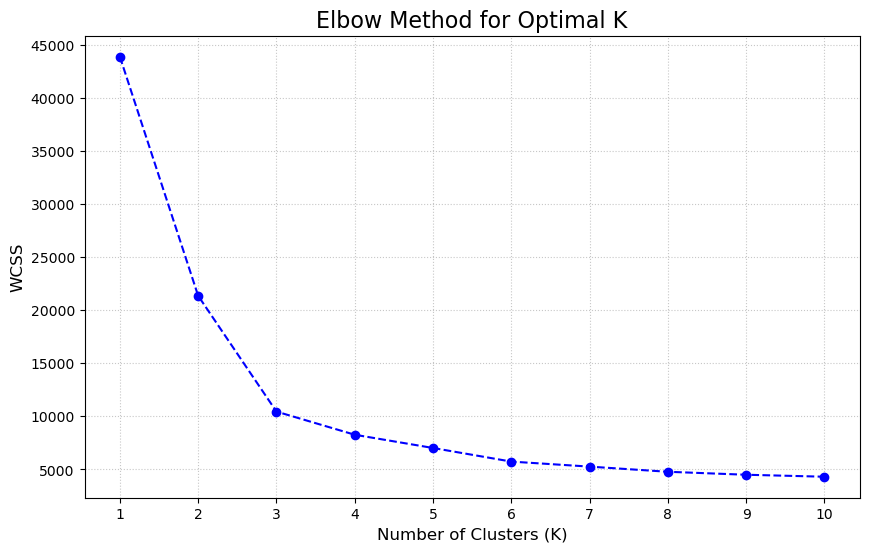

In [14]:
from sklearn.cluster import KMeans

X = df_patient_scaled # Previously normalized data
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_range, wcss, marker="o", linestyle="--", color="blue", label="WCSS")

ax.set_title("Elbow Method for Optimal K", fontsize=16)
ax.set_xlabel("Number of Clusters (K)", fontsize=12)
ax.set_ylabel("WCSS", fontsize=12)
ax.set_xticks(k_range)
ax.grid(True, linestyle=":", alpha=0.7)
plt.show()

在上圖中 $K=3$ 處已經形成了一個最明顯的「手肘」；而從 $K=3$ 到 $K=4$ 之間，WCSS 降幅已經區緩；到 $K=5$ 之後可以發現效益開始遞減

因此選擇 $K=3$ 或 $K=4$ 都是合理的，但在實務上當手肘不明顯或存在多個可能的 $K$ 值時，可以都嘗試看看，然後選擇一個在業務上最有解釋力的結果。畢竟你做這些的目的，就是提供 insight 出來，所以要思考選定集群數要如何跟分析的業務有所關聯

以下內容會先選擇 $K=4$ 做分析

#### D.3 執行 K-means (K=4) 並指派群組

現在才會進入 KMeans 演算法實做，令 `K = 4` 對標準化後的病患資料 `df_patient_scaled` 進行分群，並且取得每一位病患的群組標籤

> Ref：[`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [15]:
K = 4
kmeans = KMeans(n_clusters=K, n_init="auto", random_state=42)
kmeans.fit(df_patient_scaled)
cluster_labels = kmeans.labels_

因為解讀群組特性需要用原始數值操作，所以要將群組標籤加回到 **沒有標準化的**原始 `df_patient`  中

In [16]:
df_patient["cluster"] = cluster_labels
print(df_patient.head())

        before_visits  before_spending  after_visits  after_spending  \
病人ID                                                                   
109988         57.000      1106000.000        27.000      128000.000   
109989         39.000       750000.000        22.000      123000.000   
109990         36.000       686000.000        34.000      190000.000   
109991         42.000       808000.000        28.000      166000.000   
109992         38.000       733000.000        61.000      331000.000   

        visits_A  visits_B  visits_C  visits_D  cluster  
病人ID                                                     
109988        18        26        11        29        2  
109989        13        11        11        26        2  
109990        16        18        16        20        2  
109991        11        26        20        13        2  
109992        29        21        32        17        2  


確認 `cluster` 欄位加入後，就可以統計群集人數了

In [17]:
print(df_patient["cluster"].value_counts().sort_index())

cluster
0    3267
1     497
2     176
3    1546
Name: count, dtype: int64


現在有一個重點，就是這四組人各自代表了什麼樣的行為模式？也就是為什麼演算法會把這 3267 人分在同一組，而另外 176 人又為何分在一組？

如果要回答這個問題，那就要先計算出每個群組的 **平均輪廓**。也就是說要看群組 `0` 患者的 平均的疫情前後就診次數、花費、以及各科別就診次數是多少？還有其他群組呢？

那這時就可以根據 `cluster` 欄位對 `df_patient` 操作 `groupby()` 進行分組，然後計算每個欄位的平均值

In [18]:
cluster_summary = df_patient.groupby("cluster").mean()

print("Summary\n", cluster_summary)

Summary
          before_visits  before_spending  after_visits  after_spending  \
cluster                                                                 
0                3.755        68320.784         0.557        3602.694   
1               39.121       752859.155         4.702       34748.491   
2               40.909       777982.955        36.852      200778.409   
3               12.560       228902.329         1.781       11503.881   

         visits_A  visits_B  visits_C  visits_D  
cluster                                          
0           1.057     1.090     1.034     1.130  
1           1.545    20.404     1.575    20.298  
2          19.705    19.051    19.773    19.233  
3           3.405     3.666     3.614     3.655  


- **Cluster 0（3,267 人）：低頻就診、受到疫情衝擊**

   這是人數最多的群體，屬於**低度使用者**，在疫情前就診次數與花費最低，疫情後更趨近於零。就診科別分布平均，無科別的偏好。這類人可能比較多是因為偶爾感冒而就診的人群。遇到疫情後可能也先選擇延後或取消非必要的活動待在家裡，所以才沒有救診需求

- **Cluster 1（497 人）：對 B/D 科忠誠、受到疫情衝擊**

   疫情前有**極高**的就診次數與花費，但就診行為**高度集中**於 B 科與 D 科。而在疫情爆發後，就診次數直接大幅下降。在醫療實務中，這些有可能是 B/D 科的**慢性病或長期追蹤**的患者，很可能是醫院在疫情前的忠實客戶，但某些醫療需求屬於「可延後」類型，因此疫情期間大幅減少回診。同時可以觀察到這跟在 _Section 1. Step C._ 中在 EDA 階段發現的 B/D 科就診數大幅下降的模式很接近

- **Cluster 2（176 人）：高頻就診、剛性需求群**

   這類人數最少，但屬於**價值最高**的群體，因為在疫情前的就診次數與花費為所有群體中最多的，且平均分散於四個科別。然後這些人在疫情後的就診次數也**僅微幅下降**，也就是說他們有明顯的**醫療剛性需求**。而這些群體可能是有重大傷病、或其他緊急醫療需求的主要患者，這些人的醫療行為**不會受到**疫情影響，看消費金額也可以說是是醫院相對穩定的收入來源

- **Cluster 3（1,546 人）：中頻就診、疫情衝擊群**

   這類人群的行為模式介於集群 0 和集群 1 之間，屬於**中度使用者**。就診次數與花費高於集群 0，但遠低於集群 1 和 2。疫情後同樣大幅減少就診

#### D.4 進行視覺化

在以上從數據解讀出各群組的意義之後，就來到 K-means 的最後一步，也就是將 cluster 結果視覺化。因為資料有 8 個維度（特徵），這沒有辦法直接在 2D 平面上畫出來，為了解決這個問題，我們需要使用一種稱為主成分分析（Principal Component Analysis, PCA）的降維技術

PCA 的目標是在不失太多資訊的前提下，找到一個維度較低的 **新座標系統** 來重新表達給定的資料。對於一個有 $p$ 個原始特徵的資料集，PCA 最多可以產生 $p$ 個主成分，每一個主成分 $PC_j$ 都是原始特徵的線性組合，且彼此之間是正交的（orthogonal）

$$
PC_j = w_{j1}f_1 + w_{j2}f_2 + \ldots + w_{jp}f_p = \mathbf{w}_j^T \mathbf{f}
$$

在非視覺化的應用中，通常會選擇前 $k$ 個主成分，使得這 $k$ 個主成分解釋的變異量總和達到一個閾值（例如 95\%），以做為後續模型的輸入，即可在保留大部分資訊的同時，降低模型的複雜度。但就作業要做視覺化說，將原始的 8 個特徵，濃縮成 2 個最能代表資料變異性的 主成分 $PC_1$ 和 $PC_2$，然後就能靠用這兩個主成分作為 $X$ 軸和 $Y$ 軸畫出散佈圖即可

這裡會需要使用到 [`sklearn.decomposition`](https://scikit-learn.org/stable/api/sklearn.decomposition.html) 套件

In [19]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)

對標準化後的資料進行 PCA 降維，隨後將降維後的結果變成 `DataFrame`，並加上 cluster 標籤

In [20]:
df_patient_pca = pca.fit_transform(df_patient_scaled)

df_pca = pd.DataFrame(
    data=df_patient_pca, columns=["PC1", "PC2"], index=df_patient.index
)

df_pca["cluster"] = df_patient["cluster"]

接下來就可以畫出 scatter plot 了

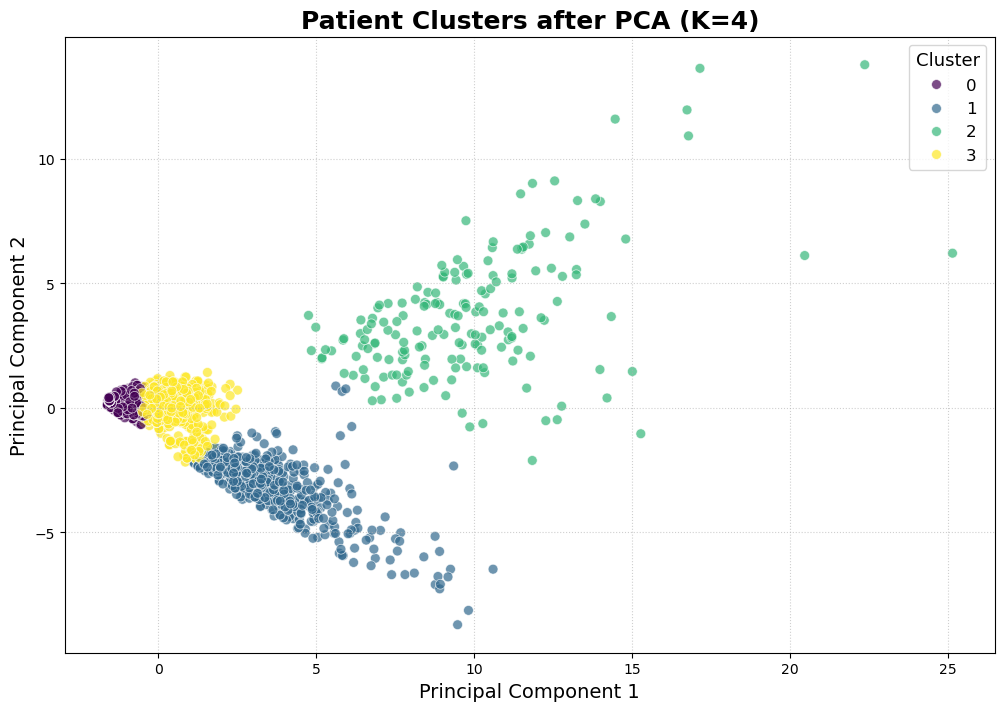

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="cluster",
    data=df_pca,
    palette="viridis", 
    s=50,
    alpha=0.7,
)

ax.set_title(f"Patient Clusters after PCA (K={K})", fontsize=18, fontweight="bold")
ax.set_xlabel("Principal Component 1", fontsize=14)
ax.set_ylabel("Principal Component 2", fontsize=14)

ax.legend(title="Cluster", title_fontsize="13", fontsize="12")
ax.grid(True, linestyle=":", alpha=0.6)

plt.show()

至此 K-means 演算法操作算是基本完成了

## Section 3. Random Forest Classification